# Shagun Varma Final Project - The Six-Year Itch

In [1]:
import pandas as pd
import numpy as np                      # numerical analysis
import matplotlib as mpl
import matplotlib.pyplot as plt         # plotting
import matplotlib.patches as mpatches   # to make ellipses
import datetime as dt                   # date adjustments

In [2]:
# Reading in the stock price, VIX, CPI, S&P 500 returns, and President dates from my GitHub repository

path = "https://github.com/shagunvarma27/data_bootcamp_final_project/blob/master/data/"
cpi_path = "CPI-U_base82-84.xlsx?raw=true"
gspc_path = "GSPC.csv?raw=true"
ixic_path = "IXIC.csv?raw=true"
dji_path = "DJI.csv?raw=true"
pres_path = "Presidents.xlsx?raw=true"
gspc_ret_path = "GSPC_ret.csv?raw=true"
vix_path = "VIX.csv?raw=true"

cpi = pd.read_excel(path + cpi_path)                  # CPI, base 1982-84
gspc = pd.read_csv(path + gspc_path)                  # S&P 500
ixic = pd.read_csv(path + ixic_path)                  # NASDAQ Composite
dji = pd.read_csv(path + dji_path)                    # Dow Jones Industrial Average
pres = pd.read_excel(path + pres_path)                # Presidential inauguration dates
gspc_ret = _path = pd.read_csv(path + gspc_ret_path)  # S&P 500 Annual Returns
vix = pd.read_csv(path + vix_path)                    # VIX

In [3]:
gspc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/1961,57.570000,57.570000,57.570000,57.570000,57.570000,2770000,GSPC
1,1/4/1961,58.360001,58.360001,58.360001,58.360001,58.360001,3840000,GSPC
2,1/5/1961,58.570000,58.570000,58.570000,58.570000,58.570000,4130000,GSPC
3,1/6/1961,58.400002,58.400002,58.400002,58.400002,58.400002,3620000,GSPC
4,1/9/1961,58.810001,58.810001,58.810001,58.810001,58.810001,4210000,GSPC


### Graph 1 - President Terms and Stock Prices

In [4]:
# Only keep the date, close and stock name

stocks = [dji, gspc, ixic]

for df in stocks:
    df.drop(["Open", "High", "Low", "Adj Close", "Volume"], axis = 1, inplace = True)

gspc.head()

,Date,Close,Stock
0,1/3/1961,57.570000,GSPC
1,1/4/1961,58.360001,GSPC
2,1/5/1961,58.570000,GSPC
3,1/6/1961,58.400002,GSPC
4,1/9/1961,58.810001,GSPC


In [5]:
# To check whether my dates for the stock data are in the correct datetime format

gspc.dtypes

Date      object
Close    float64
Stock     object
dtype: object

In [6]:
# Since the date is in the incorrect format, convert it to datetime

for df in stocks:
    df["Date"] = pd.to_datetime(df['Date'])

gspc.dtypes

Date     datetime64[ns]
Close           float64
Stock            object
dtype: object

In [7]:
# Setting the date as the index for the stock data

for df in stocks:
    df.set_index('Date', inplace = True)

In [8]:
# Resampling stock price data to the first day of the month

gspc_m = gspc.resample('MS').mean()
ixic_m = ixic.resample('MS').mean()
dji_m = dji.resample('MS').mean()

gspc_m.head()

,Close
Date,
1961-01-01,59.726191
1961-02-01,62.172631
1961-03-01,64.089090
1961-04-01,65.934000
1961-05-01,66.499048


In [9]:
# Moving on to cleaning CPI data

cpi.dtypes

Date     object
CPI     float64
dtype: object

In [10]:
# Changing CPI date to datetime format

cpi["Date"] =  pd.to_datetime(cpi['Date'])
cpi.set_index('Date', inplace = True)

cpi.head()

,CPI
Date,
1961-01-01,29.8
1961-02-01,29.8
1961-03-01,29.8
1961-04-01,29.8
1961-05-01,29.8


In [11]:
# Merge CPI and stock data on the same table for inflation-adjustment calculations
# We get NaN because CPI data is unavailable for the most recent months.

gspc_cpi = gspc_m.join(cpi)
ixic_cpi = ixic_m.join(cpi)
dji_cpi = dji_m.join(cpi)

gspc_cpi.tail()

,Close,CPI
Date,,
2019-01-01,2607.389997,251.712
2019-02-01,2754.864206,252.776
2019-03-01,2803.983794,254.202
2019-04-01,2903.799979,NaN
2019-05-01,2928.963298,NaN


In [12]:
# Creating the CPI Multiplier, adjusted to 2019-03-01 prices

stocks_cpi = [dji_cpi, gspc_cpi, ixic_cpi]

for df in stocks_cpi:
    df["CPI_Multiplier"] = df["CPI"].iloc[-3]/df["CPI"]

gspc_cpi.tail()

,Close,CPI,CPI_Multiplier
Date,,,
2019-01-01,2607.389997,251.712,1.009892
2019-02-01,2754.864206,252.776,1.005641
2019-03-01,2803.983794,254.202,1.000000
2019-04-01,2903.799979,NaN,NaN
2019-05-01,2928.963298,NaN,NaN


In [13]:
# Adjusting prices for inflation

for df in stocks_cpi:
    df["infl_adj"] = df["Close"]*df["CPI_Multiplier"]

gspc_cpi.tail()

,Close,CPI,CPI_Multiplier,infl_adj
Date,,,,
2019-01-01,2607.389997,251.712,1.009892,2633.182971
2019-02-01,2754.864206,252.776,1.005641,2770.405383
2019-03-01,2803.983794,254.202,1.000000,2803.983794
2019-04-01,2903.799979,NaN,NaN,NaN
2019-05-01,2928.963298,NaN,NaN,NaN


In [14]:
# Setting up President inauguration date table

pres.set_index("President", inplace = True)
pres

,Date
President,
John F. Kennedy,1961-01-20
Lyndon B. Johnson,1963-11-22
Richard M. Nixon,1969-01-20
Gerald R. Ford,1974-08-09
Jimmy Carter,1977-01-20
Ronald Reagan,1981-01-20
George Bush,1989-01-20
William J. Clinton,1993-01-20
George W. Bush,2001-01-20


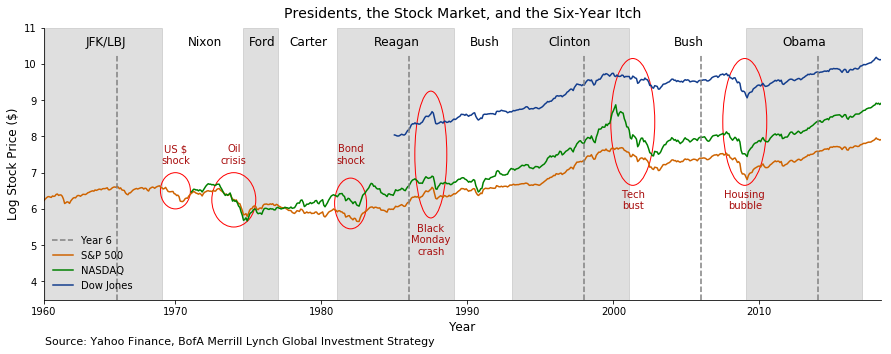

In [15]:
# Creating the first graph

fig, ax = plt.subplots(figsize = (15,5))

# Graph title
ax.set_title("Presidents, the Stock Market, and the Six-Year Itch",
             fontsize = 14, pad = 10) 

# Setting graph axis limits
ax.set_xlim((pres["Date"].loc["John F. Kennedy"]), dt.datetime(2018, 5, 1))
ax.set_xticks([dt.datetime(1960,12,30), dt.datetime(1970,1,1), dt.datetime(1980,1,1), 
               dt.datetime(1990,1,1), dt.datetime(2000,1,1), dt.datetime(2010,1,1)])
ax.set_ylim(3.5,11)

# Axis titles
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Log Stock Price ($)", fontsize = 12)

# Plotting the log of the three inflation-adjusted stock prices
ax.plot(gspc_cpi.index, np.log(gspc_cpi["infl_adj"]), color = '#CE6300')
ax.plot(ixic_cpi.index, np.log(ixic_cpi["infl_adj"]), color = 'g')
ax.plot(dji_cpi.index, np.log(dji_cpi["infl_adj"]), color = '#133D8D')

# Getting rid of the top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Setting the legend
stock_labels = ["S&P 500", "NASDAQ", "Dow Jones"]
ax.axhline(5.15, xmin = 0.01, xmax = 0.035, linestyle = '--', color = 'grey')
ax.annotate("Year 6", xy=(dt.datetime(1963,7,1), 5.05), xytext=(dt.datetime(1963,7,1), 5.05))
ax.legend(labels = stock_labels, loc = 3, frameon = False)

# Adding grey shading for President terms
ax.axvspan((pres["Date"].loc["John F. Kennedy"]), pres["Date"].loc["Richard M. Nixon"], 
           alpha = 0.25, color = 'grey')
ax.axvspan((pres["Date"].loc["Gerald R. Ford"]), pres["Date"].loc["Jimmy Carter"], 
           alpha = 0.25, color = 'grey')
ax.axvspan((pres["Date"].loc["Ronald Reagan"]), pres["Date"].loc["George Bush"], 
           alpha = 0.25, color = 'grey')
ax.axvspan((pres["Date"].loc["William J. Clinton"]), pres["Date"].loc["George W. Bush"], 
           alpha = 0.25, color = 'grey')
ax.axvspan((pres["Date"].loc["Barack Obama"]), pres["Date"].loc["Donald J. Trump"], 
           alpha = 0.25, color = 'grey')

# Dotted line in the 6th year
ax.axvline(dt.datetime(1966,1,1), ymax = 0.9, linestyle = '--', color = 'grey')
ax.axvline(dt.datetime(1986,1,1), ymax = 0.9, linestyle = '--', color = 'grey')
ax.axvline(dt.datetime(1998,1,1), ymax = 0.9, linestyle = '--', color = 'grey')
ax.axvline(dt.datetime(2006,1,1), ymax = 0.9, linestyle = '--', color = 'grey')
ax.axvline(dt.datetime(2014,1,1), ymax = 0.9, linestyle = '--', color = 'grey')

# Adding President names
ax.annotate("JFK/LBJ", xy=(dt.datetime(1963,11,1), 10.5), xytext=(dt.datetime(1963,11,1), 10.5), 
            color = 'k', fontsize = 12)
ax.annotate("Nixon", xy=(dt.datetime(1970,11,1), 10.5), xytext=(dt.datetime(1970,11,1), 10.5), 
            color = 'k', fontsize = 12)
ax.annotate("Ford", xy=(dt.datetime(1975,1,1), 10.5), xytext=(dt.datetime(1975,1,1), 10.5), 
            color = 'k', fontsize = 12)
ax.annotate("Carter", xy=(dt.datetime(1977,11,1), 10.5), xytext=(dt.datetime(1977,11,1), 10.5), 
            color = 'k', fontsize = 12)
ax.annotate("Reagan", xy=(dt.datetime(1983,8,1), 10.5), xytext=(dt.datetime(1983,8,1), 10.5), 
            color = 'k', fontsize = 12)
ax.annotate("Bush", xy=(dt.datetime(1990,3,1), 10.5), xytext=(dt.datetime(1990,3,1), 10.5), 
            color = 'k', fontsize = 12)
ax.annotate("Clinton", xy=(dt.datetime(1995,8,1), 10.5), xytext=(dt.datetime(1995,8,1), 10.5), 
            color = 'k', fontsize = 12)
ax.annotate("Bush", xy=(dt.datetime(2004,3,1), 10.5), xytext=(dt.datetime(2004,3,1), 10.5), 
            color = 'k', fontsize = 12)
ax.annotate("Obama", xy=(dt.datetime(2011,8,1), 10.5), xytext=(dt.datetime(2011,8,1), 10.5), 
            color = 'k', fontsize = 12)

# Add circles for market crashes
from matplotlib.patches import Ellipse
    # US $ shock
ax.add_artist(Ellipse((dt.datetime(1970,1,1), 6.5), 750, 1, color = 'r', fill = False))
ax.annotate("US $\nshock", xy=(dt.datetime(1970,1,1), 7.25), xytext=(dt.datetime(1970,1,1), 7.25), 
            color = '#A80D0D', ha = 'center')
    # Oil crisis
ax.add_artist(Ellipse((dt.datetime(1974,1,1), 6.25), 1100, 1.5, color = 'r', fill = False))
ax.annotate("Oil\ncrisis", xy=(dt.datetime(1974,1,1), 7.25), xytext=(dt.datetime(1974,1,1), 7.25), 
            color = '#A80D0D', ha = 'center')
    # Bond shock
ax.add_artist(Ellipse((dt.datetime(1982,1,1), 6.15), 800, 1.4, color = 'r', fill = False))
ax.annotate("Bond\nshock", xy=(dt.datetime(1982,1,1), 7.25), xytext=(dt.datetime(1982,1,1), 7.25), 
            color = '#A80D0D', ha = 'center')
    # Black Monday crash
ax.add_artist(Ellipse((dt.datetime(1987,7,1), 7.5), 800, 3.5, color = 'r', fill = False))
ax.annotate("Black\nMonday\ncrash", xy=(dt.datetime(1987,7,1), 4.75), xytext=(dt.datetime(1987,7,1), 4.75), 
            color = '#A80D0D', ha = 'center')
    # Tech bust
ax.add_artist(Ellipse((dt.datetime(2001,5,1), 8.4), 1100, 3.5, color = 'r', fill = False))
ax.annotate("Tech\nbust", xy=(dt.datetime(2001,5,1), 6), xytext=(dt.datetime(2001,5,1), 6), 
            color = '#A80D0D', ha = 'center')
    # Housing bubble
ax.add_artist(Ellipse((dt.datetime(2009,1,1), 8.4), 1100, 3.5, color = 'r', fill = False))
ax.annotate("Housing\nbubble", xy=(dt.datetime(2000,1,1), 6), xytext=(dt.datetime(2009,1,1), 6), 
            color = '#A80D0D', ha = 'center')

# Adding text below the graph
ax.text(dt.datetime(1961,1,20), 2.25, "Source: Yahoo Finance, BofA Merrill Lynch Global Investment Strategy", 
        fontsize = 11)

plt.savefig("Presidents, the Stock Market, and the Six-Year Itch.jpg", bbox_inches = "tight", dpi = 1200)

plt.show()

We see that for Reagan, Clinton and Bush, the stock market crashes fall after the 6-Year mark. This is in line with the six-year itch theory. However, there are instances where stock market crashes do not align with the theory. Reagan faced a Bond shock at the start of his presidency, and the stock market prices during the Obama presidency only went up. Moreover, the stock market crashes that "fit" the six-year itch theory are not entirely policy-related.

Furthermore, such a graph can be misleading. For instance, the mild 8-month recession during George H.W. Bush's presidency is not marked here. He did not get a second term because of slow economic growth during his presidency.

It may instead be more helpful to look at stock market returns by year of presidency instead of stock prices.

### Graph 2 - President Terms and Stock Returns

In [16]:
# Moving on to S&P 500 returns

gspc_ret.head()

,Year,Return
0,2018,-4.38
1,2017,21.83
2,2016,11.96
3,2015,1.38
4,2014,13.69


In [17]:
# Converting year to datetime format

gspc_ret.set_index("Year", inplace = True)
gspc_ret.index = pd.to_datetime(gspc_ret.index, format = '%Y')
gspc_ret.index = gspc_ret.index.to_period('A').to_timestamp('A')
gspc_ret.sort_values(by = "Year", ascending = True, inplace = True)

gspc_ret.head()

,Return
Year,
1926-12-31,11.62
1927-12-31,37.49
1928-12-31,43.61
1929-12-31,-8.42
1930-12-31,-24.90


In [18]:
# Drop data points before 1961

gspc_ret = gspc_ret.loc[(gspc_ret.index > dt.datetime(1960,12,31))]
gspc_ret.head()

,Return
Year,
1961-12-31,26.89
1962-12-31,-8.73
1963-12-31,22.80
1964-12-31,16.48
1965-12-31,12.45


In [19]:
# Adjusting CPI dates to make them annual and end of year

cpi.index = cpi.index.to_period('M').to_timestamp('M')
cpi_annual = cpi.resample('A').last()
cpi_annual.head()

,CPI
Date,
1961-12-31,30.0
1962-12-31,30.4
1963-12-31,30.9
1964-12-31,31.2
1965-12-31,31.8


In [20]:
# Merge CPI and return data into one table

gspc_ret_cpi = gspc_ret.join(cpi_annual)
gspc_ret_cpi.head()

,Return,CPI
Year,,
1961-12-31,26.89,30.0
1962-12-31,-8.73,30.4
1963-12-31,22.80,30.9
1964-12-31,16.48,31.2
1965-12-31,12.45,31.8


In [21]:
# Calculating the inflation rate

gspc_ret_cpi["infl_rate"] = gspc_ret_cpi["CPI"].diff()/gspc_ret_cpi["CPI"].shift()

# Adjust returns for inflation using formula
# Formula from: https://www.investopedia.com/terms/i/inflation_adjusted_return.asp

gspc_ret_cpi['infl_adj'] = ((1 + gspc_ret_cpi["Return"])/(1 + gspc_ret_cpi["infl_rate"])) - 1
gspc_ret_cpi.tail()

,Return,CPI,infl_rate,infl_adj
Year,,,,
2014-12-31,13.69,234.812,0.007565,13.579706
2015-12-31,1.38,236.525,0.007295,1.362763
2016-12-31,11.96,241.432,0.020746,11.696594
2017-12-31,21.83,246.524,0.021091,21.358442
2018-12-31,-4.38,251.233,0.019102,-4.316647


In [22]:
# Making President data end of year to match with returns dates

pres2 = pres.copy()
pres2.reset_index(inplace = True)
pres2.set_index("Date", inplace = True)
pres2.index = pres2.index.to_period('A').to_timestamp('A')
pres2

,President
Date,
1961-12-31,John F. Kennedy
1963-12-31,Lyndon B. Johnson
1969-12-31,Richard M. Nixon
1974-12-31,Gerald R. Ford
1977-12-31,Jimmy Carter
1981-12-31,Ronald Reagan
1989-12-31,George Bush
1993-12-31,William J. Clinton
2001-12-31,George W. Bush


In [23]:
# Merging President and returns data

year1 = pres2.join(gspc_ret_cpi)
year1.drop(["CPI", "Return", "infl_rate"], axis = 1, inplace = True)
year1

,President,infl_adj
Date,,
1961-12-31,John F. Kennedy,NaN
1963-12-31,Lyndon B. Johnson,22.414887
1969-12-31,Richard M. Nixon,-8.062334
1974-12-31,Gerald R. Ford,-23.672717
1977-12-31,Jimmy Carter,-6.791884
1981-12-31,Ronald Reagan,-4.589713
1989-12-31,George Bush,30.238263
1993-12-31,William J. Clinton,9.783621
2001-12-31,George W. Bush,-11.723599


In [24]:
# Creating a dates table for year 2

year2_dates = pres2.copy()
year2_dates.reset_index(inplace = True)

# Adding a year to the year 1 date for year 2

year2_dates["Date_2"] = year2_dates["Date"] - pd.DateOffset(years=-1)
year2_dates.set_index("Date_2", inplace = True)
year2_dates.drop(["Date",], axis = 1, inplace = True)
year2_dates

,President
Date_2,
1962-12-31,John F. Kennedy
1964-12-31,Lyndon B. Johnson
1970-12-31,Richard M. Nixon
1975-12-31,Gerald R. Ford
1978-12-31,Jimmy Carter
1982-12-31,Ronald Reagan
1990-12-31,George Bush
1994-12-31,William J. Clinton
2002-12-31,George W. Bush


In [25]:
# Merge with returns data

year2 = year2_dates.join(gspc_ret_cpi)
year2.drop(["CPI", "Return", "infl_rate"], axis = 1, inplace = True)
year2

,President,infl_adj
Date_2,,
1962-12-31,John F. Kennedy,-8.628289
1964-12-31,Lyndon B. Johnson,16.311923
1970-12-31,Richard M. Nixon,3.745653
1975-12-31,Gerald R. Ford,34.722162
1978-12-31,Jimmy Carter,5.934653
1982-12-31,Ronald Reagan,20.718238
1990-12-31,George Bush,-2.979148
1994-12-31,William J. Clinton,1.259559
2002-12-31,George W. Bush,-21.610116


In [26]:
# Creating a table for year 3

year3_dates = year2_dates.copy()
year3_dates.reset_index(inplace = True)
year3_dates["Date_3"] = year3_dates["Date_2"] - pd.DateOffset(years=-1)
year3_dates.set_index("Date_3", inplace = True)
year3_dates.drop(["Date_2",], axis = 1, inplace = True)

# Remove rows for JFK and Trump because they didn't/have yet to have a third year

year3_dates.drop([dt.datetime(1963,12,31), dt.datetime(2019,12,31)], axis = 0, inplace = True)

# Merge with returns data

year3 = year3_dates.join(gspc_ret_cpi)
year3.drop(["CPI", "Return", "infl_rate"], axis = 1, inplace = True)
year3

,President,infl_adj
Date_3,,
1965-12-31,Lyndon B. Johnson,12.196226
1971-12-31,Richard M. Nixon,13.825742
1976-12-31,Gerald R. Ford,22.687629
1979-12-31,Jimmy Carter,16.158905
1983-12-31,Ronald Reagan,21.699467
1991-12-31,George Bush,29.534344
1995-12-31,William J. Clinton,36.624925
2003-12-31,George W. Bush,28.132458
2011-12-31,Barack Obama,2.020520


In [27]:
# Creating a table for year 4

year4_dates = year3_dates.copy()
year4_dates.reset_index(inplace = True)
year4_dates["Date_4"] = year4_dates["Date_3"] - pd.DateOffset(years=-1)
year4_dates.set_index("Date_4", inplace = True)
year4_dates.drop(["Date_3",], axis = 1, inplace = True)

# Remove rows for Ford because he didn't have a fourth year

year4_dates.drop([dt.datetime(1977,12,31)], axis = 0, inplace = True)

# Merge with returns data

year4 = year4_dates.join(gspc_ret_cpi)
year4.drop(["CPI", "Return", "infl_rate"], axis = 1, inplace = True)
year4

,President,infl_adj
Date_4,,
1966-12-31,Lyndon B. Johnson,-9.757082
1972-12-31,Richard M. Nixon,18.321835
1980-12-31,Jimmy Carter,28.702364
1984-12-31,Ronald Reagan,5.993837
1992-12-31,George Bush,7.377012
1996-12-31,William J. Clinton,22.189533
2004-12-31,George W. Bush,10.505434
2012-12-31,Barack Obama,15.709091


In [28]:
# Creating a table for year 5

year5_dates = year4_dates.copy()
year5_dates.reset_index(inplace = True)
year5_dates["Date_5"] = year5_dates["Date_4"] - pd.DateOffset(years=-1)
year5_dates.set_index("Date_5", inplace = True)
year5_dates.drop(["Date_4",], axis = 1, inplace = True)

# Remove rows for Carter and George HW Bush because they didn't have a fifth year

year5_dates.drop([dt.datetime(1981,12,31), dt.datetime(1993,12,31)], axis = 0, inplace = True)

# Merge with returns data

year5 = year5_dates.join(gspc_ret_cpi)
year5.drop(["CPI", "Return", "infl_rate"], axis = 1, inplace = True)
year5

,President,infl_adj
Date_5,,
1967-12-31,Lyndon B. Johnson,23.243127
1973-12-31,Richard M. Nixon,-13.566017
1985-12-31,Ronald Reagan,30.532196
1997-12-31,William J. Clinton,32.784848
2005-12-31,George W. Bush,4.714802
2013-12-31,Barack Obama,31.895989


In [29]:
# Creating a table for year 6

year6_dates = year5_dates.copy()
year6_dates.reset_index(inplace = True)
year6_dates["Date_6"] = year6_dates["Date_5"] - pd.DateOffset(years=-1)
year6_dates.set_index("Date_6", inplace = True)
year6_dates.drop(["Date_5",], axis = 1, inplace = True)

# Remove rows for Nixon because he didn't have a sixth year

year6_dates.drop([dt.datetime(1974,12,31)], axis = 0, inplace = True)

# Merge with returns data

year6 = year6_dates.join(gspc_ret_cpi)
year6.drop(["CPI", "Return", "infl_rate"], axis = 1, inplace = True)
year6

,President,infl_adj
Date_6,,
1968-12-31,Lyndon B. Johnson,10.516451
1986-12-31,Ronald Reagan,18.456389
1998-12-31,William J. Clinton,28.110763
2006-12-31,George W. Bush,15.373994
2014-12-31,Barack Obama,13.579706


In [30]:
# Creating a table for year 7

year7_dates = year6_dates.copy()
year7_dates.reset_index(inplace = True)
year7_dates["Date_7"] = year7_dates["Date_6"] - pd.DateOffset(years=-1)
year7_dates.set_index("Date_7", inplace = True)
year7_dates.drop(["Date_6",], axis = 1, inplace = True)

# Remove rows for LBJ because he didn't have a seventh year

year7_dates.drop([dt.datetime(1969,12,31)], axis = 0, inplace = True)

# Merge with returns data

year7 = year7_dates.join(gspc_ret_cpi)
year7.drop(["CPI", "Return", "infl_rate"], axis = 1, inplace = True)
year7

,President,infl_adj
Date_7,,
1987-12-31,Ronald Reagan,4.984619
1999-12-31,William J. Clinton,20.463791
2007-12-31,George W. Bush,5.235512
2015-12-31,Barack Obama,1.362763


In [33]:
# Creating a table for year 8

year8_dates = year7_dates.copy()
year8_dates.reset_index(inplace = True)
year8_dates["Date_8"] = year8_dates["Date_7"] - pd.DateOffset(years=-1)
year8_dates.set_index("Date_8", inplace = True)
year8_dates.drop(["Date_7",], axis = 1, inplace = True)

# Merge with returns data

year8 = year8_dates.join(gspc_ret_cpi)
year8.drop(["CPI", "Return", "infl_rate"], axis = 1, inplace = True)
year8

,President,infl_adj
Date_8,,
1988-12-31,Ronald Reagan,15.864680
2000-12-31,William J. Clinton,-8.834655
2008-12-31,George W. Bush,-36.967121
2016-12-31,Barack Obama,11.696594


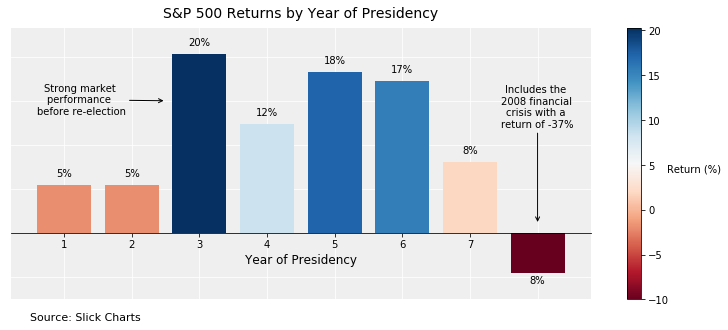

In [34]:
# Creating the second graph

fig, ax = plt.subplots(figsize = (13,5))

# Set grid lines and background color
ax.grid(color = 'white')
ax.set_axisbelow(True)
ax.set_facecolor('#EFEFEF')

# Graph title
ax.set_title("S&P 500 Returns by Year of Presidency", fontsize = 14, pad = 10)

# Axis titles
ax.set_xlabel("Year of Presidency", fontsize = 12)

# Creating a list with mean returns per year
infl_adj = [year1["infl_adj"].mean(), year2["infl_adj"].mean(), year3["infl_adj"].mean(), 
            year4["infl_adj"].mean(), year5["infl_adj"].mean(), year6["infl_adj"].mean(),
            year7["infl_adj"].mean(), year8["infl_adj"].mean()]

# Axis limits
ax.set_ylim(min(infl_adj)-3, max(infl_adj)+3)

# Shading in bars by value
# Source: https://stackoverflow.com/questions/51204505/python-barplot-with-colorbar

data_color = [x / max(infl_adj) for x in infl_adj]
my_cmap = plt.cm.get_cmap('RdBu')
colors = my_cmap(data_color)

from matplotlib.cm import ScalarMappable
sm = ScalarMappable(cmap = my_cmap, norm = plt.Normalize(-10, max(infl_adj)))
sm.set_array([])

cbar = plt.colorbar(sm)
cbar.set_label('Return (%)', rotation = 360, labelpad = 25)

# Plotting the inflation-adjusted stock return
counter = 1

for mean in infl_adj:
    ax.bar(counter, mean, color = colors[counter-1])
    counter = counter + 1

# Adding data labels over plot
counter2 = 1

for mean in infl_adj[0:-1]:
    ax.annotate(str(round(mean))+'%', xy=(counter2, mean+1), xytext=(counter2, mean+1), 
            color = 'k', fontsize = 10, ha = 'center')
    counter2 = counter2 + 1

ax.annotate(str(round(mean))+'%', xy=(counter2, year8["infl_adj"].mean()-1.2), 
            xytext=(counter2, year8["infl_adj"].mean()-1.2), 
            color = 'k', fontsize = 10, ha = 'center')

# Adding arrow and annotation for year 3
ax.annotate("Strong market \nperformance \nbefore re-election", 
    xy = (2.5, 15), xycoords = "data", xytext = (1.25, 13.45), horizontalalignment = "center", 
    arrowprops={"arrowstyle": "->","color": "black"})

# Adding arrow and annotation for year 8
ax.annotate("Includes the \n2008 financial \ncrisis with a \nreturn of -37%", 
    xy = (8, 1), xycoords = "data", xytext = (8, 12), horizontalalignment = "center",
    arrowprops={"arrowstyle": "->", "color": "black"})

# Getting rid of the top, right and left spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(left = False)
ax.set_yticklabels([])

# Moving bottom axis to y = 0
ax.spines['bottom'].set_position(('data', 0))

# Adding text below the graph
ax.text(0.5, -10, "Source: Slick Charts", fontsize = 11)

plt.savefig("S&P 500 Returns by Year of Presidency", bbox_inches = "tight", dpi = 1200)

plt.show()

The data in this graph tells a completely different story, but makes logical sense. We see that in year 3, stock market performance is the strongest. This is because when presidents face re-election, they push for economic growth so that the public is in their favor and they are re-elected.

In year 6, we do not see a big drop in returns as would be expected with the six-year itch.

Interestingly in year 8, we see negative returns. We could explain this with the logic that in year 8, the president does not need to worry about re-election and therefore is not too concerned with economic growth. However, the reason that the returns in year 8 are this low is because the average includes the 2008 financial crisis with a return of -37%.

It would be interesting to take a look at what happened during 2008.

### Graph 3 - Volatility during the George W. Bush Presidency

In [35]:
# Moving on to VIX data

vix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1,1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
2,1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
3,1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
4,1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0


In [36]:
# Converting date to datetime
# Set date as index

vix["Date"] = pd.to_datetime(vix['Date'])
vix.set_index("Date", inplace = True)
vix.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0


In [37]:
# Choosing VIX data only for the Bush and Obama presidency

vix_bush = vix.loc[pres["Date"].loc["George W. Bush"] : pres["Date"].loc["Donald J. Trump"]]
vix_bush.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-13,11.45,11.62,10.94,11.23,11.23,0
2017-01-17,12.20,12.75,11.79,11.87,11.87,0
2017-01-18,11.79,12.81,11.69,12.48,12.48,0
2017-01-19,12.58,13.28,12.17,12.78,12.78,0
2017-01-20,12.58,12.59,11.53,11.54,11.54,0


In [38]:
# Resample VIX data to weekly

vix_w = vix_bush.resample('W').mean()
vix_w.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-28,22.842,23.156000,22.258,22.4120,22.4120,0
2001-02-04,22.414,22.792000,21.886,22.1620,22.1620,0
2001-02-11,21.910,22.268001,21.424,21.8660,21.8660,0
2001-02-18,21.940,22.310000,21.224,21.4400,21.4400,0
2001-02-25,25.345,27.400000,25.075,26.1025,26.1025,0


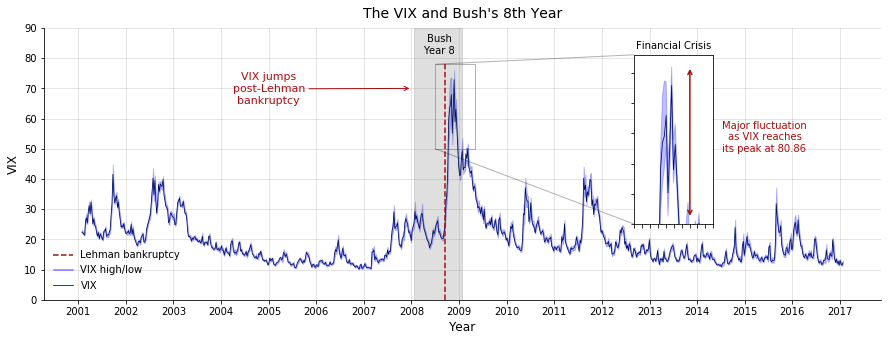

In [39]:
# Creating the third graph

fig, ax = plt.subplots(figsize = (15,5))

# Graph title
ax.set_title("The VIX and Bush's 8th Year", fontsize = 14, pad = 10)

# Axis titles
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("VIX", fontsize = 12)

# Set graph limits and ticks
ax.set_ylim(0,90)
ax.set_xticks([dt.datetime(2001,1,1), dt.datetime(2002,1,1), dt.datetime(2003,1,1), 
               dt.datetime(2004,1,1), dt.datetime(2005,1,1), dt.datetime(2006,1,1),
               dt.datetime(2007,1,1), dt.datetime(2008,1,1), dt.datetime(2009,1,1),
               dt.datetime(2010,1,1), dt.datetime(2011,1,1), dt.datetime(2012,1,1),
               dt.datetime(2013,1,1), dt.datetime(2014,1,1), dt.datetime(2015,1,1),
               dt.datetime(2016,1,1), dt.datetime(2017,1,1)])

# Show grid lines
ax.grid(color = 'grey', alpha = 0.25)

# Plot the VIX data
ax.plot(vix_w.index, vix_w["Close"], color = '#001060', linewidth = 0.8)

# Fill high/low VIX data
ax.fill_between(vix_w.index, vix_w["High"], vix_w["Low"], alpha = 0.25, color = 'b')

# Zoomed inset

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

    # Create inset box
axins = zoomed_inset_axes(ax, 2, loc = 2, bbox_to_anchor=(705,310), borderpad = 2)

    # Data to plot on inset
axins.plot(vix_w.index, vix_w["Close"], color = '#001060', linewidth = 0.8)
axins.fill_between(vix_w.index, vix_w["High"], vix_w["Low"], alpha = 0.25, color = 'b')

    # Set inset axis and ticks
axins.set_xlim(dt.datetime(2008,7,1), dt.datetime(2009,5,1))
axins.set_ylim(50, 78)
axins.set_xticklabels('')
axins.set_yticklabels('')

    # Inset title
axins.set_title("Financial Crisis", fontsize = 10)

    # Lines to mark where inset data came from
mark_inset(ax, axins, loc1 = 3, loc2 = 2, fc="none", alpha = 0.3, color = 'k')

# Getting rid of the top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Fill Bush's eigth year in grey
ax.axvspan(pres["Date"].loc["Barack Obama"] - pd.DateOffset(years=1), 
           pres["Date"].loc["Barack Obama"], alpha = 0.25, color = 'grey')

# Label Bush's eight year
ax.annotate("Bush\nYear 8", xy=(dt.datetime(2008,8,1), 81.5), 
            xytext=(dt.datetime(2008,8,1), 81.5), ha = 'center')

# Dotted line for Lehman collapse
ax.axvline(dt.datetime(2008,9,15), ymax = 0.87, linestyle = '--', color = '#A80D0D')

# Adding arrow and annotation for VIX jump
ax.annotate("VIX jumps\npost-Lehman\nbankruptcy", 
            xy = (dt.datetime(2008,1,1), 70), xycoords = "data", 
            xytext = (dt.datetime(2005,1,1), 65), ha = "center", color = '#A80D0D',
            fontsize = 11, arrowprops={"arrowstyle": "->","color": '#A80D0D'})

# Adding arrow and annotation for VIX peak
ax.annotate("Major fluctuation\nas VIX reaches\nits peak at 80.86", 
            xy = (dt.datetime(2014,9,1), 53.5), xycoords = "data", 
            xytext = (dt.datetime(2015,6,1), 49), ha = "center", color = '#A80D0D')

axins.annotate(s='', xy=(dt.datetime(2009,2,1),51), xycoords = "data",
               xytext=(dt.datetime(2009,2,1),76),ha = 'center', 
               arrowprops={"arrowstyle":"<->","color":"#A80D0D", "linewidth":1.5})

# Setting legend
ax.legend(labels = ["VIX"], loc = 3, frameon = False)

    # Legend for Lehman Bankruptcy
ax.axhline(15, xmin = 0.011, xmax = 0.035, linestyle = '--', color = '#A80D0D')
ax.annotate("Lehman bankruptcy", xy=(dt.datetime(2001,1,15), 14), xytext=(dt.datetime(2001,1,15), 14))

    # Legend for High, Low
ax.axhline(10, xmin = 0.012, xmax = 0.035, color = 'b', alpha = 0.5)
ax.annotate("VIX high/low", xy=(dt.datetime(2001,1,15), 9), xytext=(dt.datetime(2001,1,15), 9))

plt.savefig("The VIX and Bush's 8th Year", bbox_inches = "tight", dpi = 1200)

plt.show()

We see a major spike in the VIX in the eighth year of George W. Bush's presidency, right after Lehman Brothers filed for bankruptcy.

Economists are divided on the extent to which Bush is to blame, however, there is general agreement that Bush's lack of financial regulation lead to banks taking riskier choicesthat ultimately lead to the Lehman bankruptcy.

(Source: https://www.nytimes.com/2008/09/20/business/worldbusiness/20iht-prexy.4.16321064.html)

We see the economic effects in the major fluctuation of the VIX during Bush's eigth year. The VIX reached its peak at 80.86 - an all time high.

While we do not see the effects of the six-year itch here, the data from the three graphs demands more research into the eigth year of a president's term.

## Bibliography

**Data Sources:**
- Stock price and VIX data: Yahoo Finance
- CPI: Bureau of Labor Statistics
- President dates: https://historyinpieces.com/research/presidential-inauguration-dates
- S&P 500 returns: https://www.slickcharts.com/sp500/returns

**Other:**
- Graph inspiration: https://www.affiancefinancial.com/node/147682
- Inflation-adj return formula: https://www.investopedia.com/terms/i/inflation_adjusted_return.asp
- Shading in bar chart: https://stackoverflow.com/questions/51204505/python-barplot-with-colorbar
- Analysis of Bush's role in the 2008 financial crisis: https://www.nytimes.com/2008/09/20/business/worldbusiness/20iht-prexy.4.16321064.html